# Importing Libraries

In [2]:
import keras
import PIL

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras.layers import Activation, BatchNormalization

# Defining Model Architecture

In [3]:
def model_builder():
    model = Sequential()
    
    model.add(Conv2D(32, (3,3) ,input_shape=(200, 200, 1), activation='relu', padding='same')) #Convolution
    model.add(MaxPooling2D(pool_size= (2,2), strides=2)) #Pooling
    model.add(Dropout(0.05))
    
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) #Convolution
    model.add(MaxPooling2D(pool_size= (2,2), strides=2)) #Pooling
    model.add(Dropout(0.05))
    
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) #Convolution
    model.add(MaxPooling2D(pool_size= (2,2), strides=2)) #Pooling
    model.add(Dropout(0.05))
    
    model.add(Flatten())
    model.add(Dropout(0.6))
    
    model.add(Dense(units=128, activation='relu', kernel_initializer='uniform'))
    model.add(Dense(units=2, activation='softmax'))
    
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    
    model.summary()
    
    return model

# Initializing Callbacks

In [4]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=6)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=1, 
                                            verbose=1, 
                                            factor=0.75, 
                                            min_lr=0.00005)

callbacks = [earlystop, learning_rate_reduction]

# Loading Training and Validation Images

In [14]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(rescale=1/255, 
                                    shear_range=0.1,
                                    zoom_range=0.1,
                                    horizontal_flip=True,
                                    validation_split=0.20)    

training_dataset = image_generator.flow_from_directory(directory='C:/Users/Sweet Home/Desktop/Real-Time-Face-Mask-Detection-Model-master/Resources/Data/', 
                                                       target_size=(200,200),
                                                       color_mode='grayscale',
                                                       batch_size = 32, 
                                                       subset="training",
                                                       class_mode='categorical')
                                          

validation_dataset = image_generator.flow_from_directory(directory='C:/Users/Sweet Home/Desktop/Real-Time-Face-Mask-Detection-Model-master/Resources/Data/', 
                                                         target_size=(200,200),
                                                         color_mode='grayscale',
                                                         batch_size = 32, 
                                                         subset="validation",
                                                         class_mode='categorical')

Found 3067 images belonging to 2 classes.
Found 766 images belonging to 2 classes.


# Visualizing Dataset

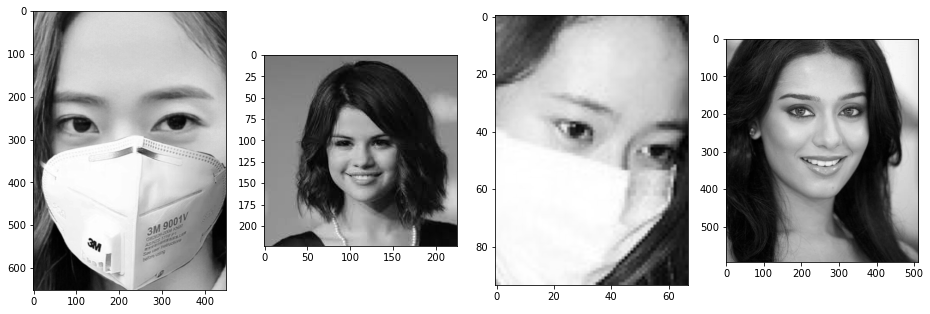

In [15]:
import cv2
from matplotlib import pyplot as plt

image1 = cv2.imread('Resources/Data/with_mask/93.jpg' ,1)
image2 = cv2.imread('Resources/Data/with_mask/96.jpg', 1)
image3 = cv2.imread('Resources/Data/without_mask/11.jpg', 1)
image4 = cv2.imread('Resources/Data/without_mask/16.jpg' , 1)

image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,5,1)
ax2 = fig.add_subplot(1,5,3)
ax3 = fig.add_subplot(1,5,2)
ax4 = fig.add_subplot(1,5,4)

ax1.imshow(image1, cmap='gray')
ax2.imshow(image2, cmap='gray')
ax3.imshow(image3, cmap='gray')
ax4.imshow(image4, cmap='gray')

plt.show()

In [16]:
model = model_builder()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 32)       

# Fitting Model

In [17]:
history = model.fit_generator(training_dataset, 
                              steps_per_epoch=2067//32, 
                              epochs=15,
                              validation_data=validation_dataset, 
                              validation_steps=766//32,
                              callbacks=callbacks)

Epoch 1/15
32/64 [==============>...............] - ETA: 52s - loss: 0.6654 - accuracy: 0.6025

C:\anaconda\envs\tensorflow_env\lib\site-packages\PIL\Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


64/64 [==============================] - 119s 2s/step - loss: 0.6007 - accuracy: 0.6696 - val_loss: 0.5897 - val_accuracy: 0.7323
Epoch 2/15
64/64 [==============================] - 110s 2s/step - loss: 0.4228 - accuracy: 0.8052 - val_loss: 0.4725 - val_accuracy: 0.7752
Epoch 3/15
64/64 [==============================] - 113s 2s/step - loss: 0.3377 - accuracy: 0.8491 - val_loss: 0.3225 - val_accuracy: 0.8597
Epoch 4/15
64/64 [==============================] - 115s 2s/step - loss: 0.2886 - accuracy: 0.8825 - val_loss: 0.2571 - val_accuracy: 0.8760
Epoch 5/15
64/64 [==============================] - 115s 2s/step - loss: 0.2388 - accuracy: 0.9046 - val_loss: 0.2123 - val_accuracy: 0.9074
Epoch 6/15
64/64 [==============================] - 110s 2s/step - loss: 0.2425 - accuracy: 0.8975 - val_loss: 0.1621 - val_accuracy: 0.9046

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0007500000356230885.
Epoch 7/15
64/64 [==============================] - 109s 2s/step - loss: 0.2028 - ac

In [18]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy', 'lr'])

# Plotting Accuracy and Loss

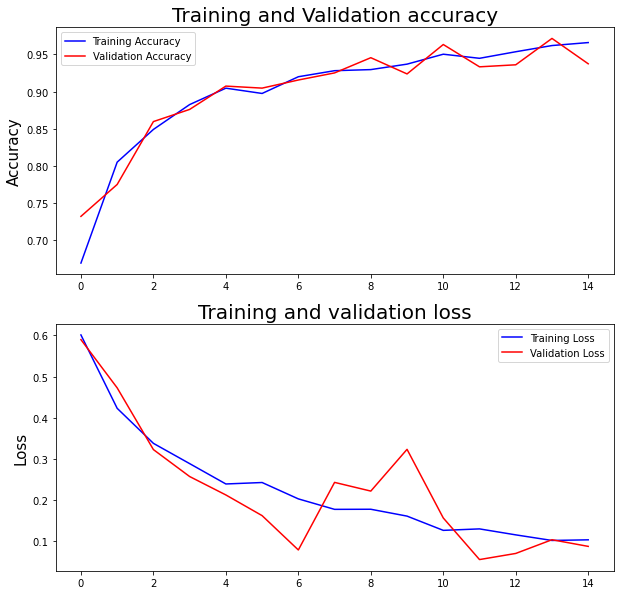

In [19]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

fig = plt.figure(figsize=(10,10),edgecolor='Black') 
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(accuracy, label='Training Accuracy', color='Blue')
ax1.plot(val_accuracy, label='Validation Accuracy', color='Red')
ax1.set_title("Training and Validation accuracy", fontsize=20)
ax1.set_ylabel("Accuracy", fontsize=15)
ax1.legend()

ax2.plot(loss, label='Training Loss', color='Blue')
ax2.plot(val_loss, label='Validation Loss', color='Red')
ax2.set_title("Training and validation loss", fontsize=20)
ax2.set_ylabel("Loss", fontsize=15)
ax2.legend()

plt.show()

# Accuracy of Model

In [20]:
print("Accuracy Score:" , round(accuracy[-1]*100))

Accuracy Score: 97


# Saving Model

In [21]:
model.save('Resources/mask_detector/detector-model')